In [291]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [292]:
Url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url)


In [293]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [294]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [295]:
x = titanic.drop(columns='Survived')
y = titanic[['Survived']]

In [296]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [297]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [298]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


C:\Users\Pranav\AppData\Local\Temp\ipykernel_7840\1438465917.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex',data = titanic , ci = None )


<Axes: xlabel='Pclass', ylabel='Survived'>

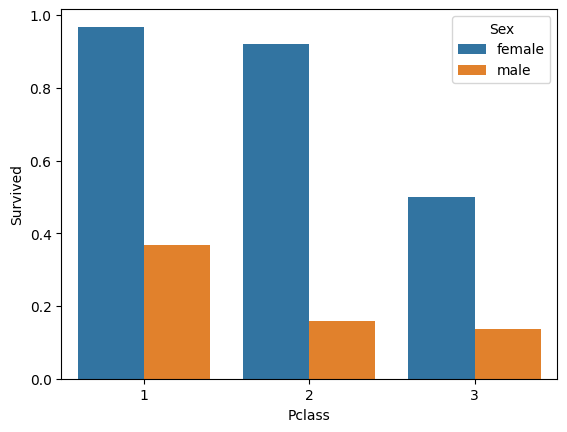

In [299]:
sb.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex',data = titanic , ci = None )

In [300]:
x = x.drop(columns= 'Name')
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,male,26.0,0,0,111369,30.0000,C148,C


In [301]:
x['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [302]:
x = x.drop(columns='SibSp')
x

,PassengerId,Pclass,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,211536,13.0000,NaN,S
887,888,1,female,19.0,0,112053,30.0000,B42,S
888,889,3,female,NaN,2,W./C. 6607,23.4500,NaN,S
889,890,1,male,26.0,0,111369,30.0000,C148,C


In [303]:
x = x.drop(columns= 'Embarked')
x = x.drop(columns= 'Fare')
x = x.drop(columns= 'Cabin')
x = x.drop(columns= 'Parch')
x

,PassengerId,Pclass,Sex,Age,Ticket
0,1,3,male,22.0,A/5 21171
1,2,1,female,38.0,PC 17599
2,3,3,female,26.0,STON/O2. 3101282
3,4,1,female,35.0,113803
4,5,3,male,35.0,373450
...,...,...,...,...,...
886,887,2,male,27.0,211536
887,888,1,female,19.0,112053
888,889,3,female,NaN,W./C. 6607
889,890,1,male,26.0,111369


In [304]:
x = x.drop(columns='Ticket')
x

,PassengerId,Pclass,Sex,Age
0,1,3,male,22.0
1,2,1,female,38.0
2,3,3,female,26.0
3,4,1,female,35.0
4,5,3,male,35.0
...,...,...,...,...
886,887,2,male,27.0
887,888,1,female,19.0
888,889,3,female,NaN
889,890,1,male,26.0


In [305]:
x['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='Age', ylabel='Survived'>

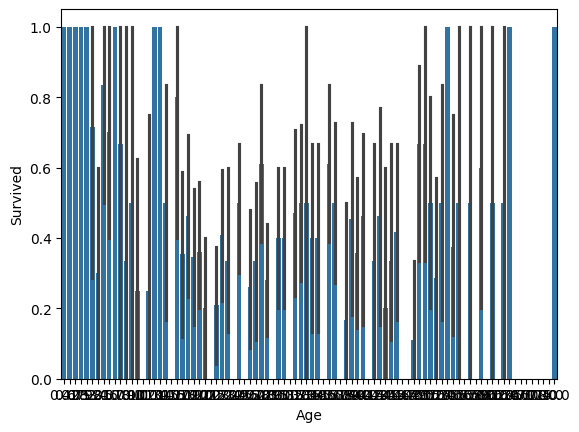

In [306]:
sb.barplot(x= 'Age', y = 'Survived',data= titanic)

In [307]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [308]:
mean_age = x['Age'].mean()
x['Age'] = x['Age'].fillna(mean_age)
x['Age_Category'] = pd.cut(titanic['Age'], bins=[0, 18, 65, float('inf')], labels=[1, 2, 3])
x['Age_Category'].value_counts()

Age_Category
2    567
1    139
3      8
Name: count, dtype: int64

In [309]:
x

,PassengerId,Pclass,Sex,Age,Age_Category
0,1,3,male,22.000000,2
1,2,1,female,38.000000,2
2,3,3,female,26.000000,2
3,4,1,female,35.000000,2
4,5,3,male,35.000000,2
...,...,...,...,...,...
886,887,2,male,27.000000,2
887,888,1,female,19.000000,2
888,889,3,female,29.699118,NaN
889,890,1,male,26.000000,2


In [310]:
age_dummies = pd.get_dummies(x['Age_Category'], prefix='Age_Category', drop_first=True)
df_with_dummies = pd.concat([x, age_dummies], axis=1)
df_with_dummies.drop(['Age', 'Age_Category'], axis=1, inplace=True)

In [311]:
dummies1 = pd.get_dummies(x['Sex'],prefix='Gender',drop_first=True)
new_df = pd.concat([df_with_dummies, dummies1], axis=1)
new_df.drop(['Sex'], axis=1,inplace=True)
new_df

,PassengerId,Pclass,Age_Category_2,Age_Category_3,Gender_male
0,1,3,True,False,True
1,2,1,True,False,False
2,3,3,True,False,False
3,4,1,True,False,False
4,5,3,True,False,True
...,...,...,...,...,...
886,887,2,True,False,True
887,888,1,True,False,False
888,889,3,False,False,False
889,890,1,True,False,True


In [312]:
x.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
Age_Category    177
dtype: int64

In [313]:
new_df.isnull().sum()

PassengerId       0
Pclass            0
Age_Category_2    0
Age_Category_3    0
Gender_male       0
dtype: int64

In [314]:
new_df

,PassengerId,Pclass,Age_Category_2,Age_Category_3,Gender_male
0,1,3,True,False,True
1,2,1,True,False,False
2,3,3,True,False,False
3,4,1,True,False,False
4,5,3,True,False,True
...,...,...,...,...,...
886,887,2,True,False,True
887,888,1,True,False,False
888,889,3,False,False,False
889,890,1,True,False,True


In [315]:
X_train, X_test, y_train, y_test = train_test_split(new_df,y,test_size=0.4, random_state=42)

In [316]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [317]:
y_pred = model.predict(X_test)

In [318]:
accuracy1 = accuracy_score(y_test,y_pred)

In [319]:
class_report = classification_report(y_test, y_pred)

In [320]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [321]:
print("Accuracy:", accuracy1)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.773109243697479
Confusion Matrix:
[[183  33]
 [ 48  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       216
           1       0.74      0.66      0.70       141

    accuracy                           0.77       357
   macro avg       0.77      0.75      0.76       357
weighted avg       0.77      0.77      0.77       357



In [322]:
model = SVC()

In [323]:
model.fit(X_train,y_train)

C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [324]:
y_pred = model.predict(X_test)

In [325]:
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [326]:
print("Accuracy:", accuracy2)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6050420168067226
Confusion Matrix:
[[216   0]
 [141   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.75       216
           1       0.00      0.00      0.00       141

    accuracy                           0.61       357
   macro avg       0.30      0.50      0.38       357
weighted avg       0.37      0.61      0.46       357



In [327]:
model = DecisionTreeClassifier()

In [328]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [329]:
y_pred = model.predict(X_test)

In [330]:
accuracy3 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [331]:
print("Accuracy:", accuracy3)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6722689075630253
Confusion Matrix:
[[159  57]
 [ 60  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       216
           1       0.59      0.57      0.58       141

    accuracy                           0.67       357
   macro avg       0.66      0.66      0.66       357
weighted avg       0.67      0.67      0.67       357



In [332]:
model = RandomForestClassifier()

In [333]:
model.fit(X_train,y_train)

C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [334]:
y_pred = model.predict(X_test)

In [335]:
accuracy4 = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)

In [336]:
print("Accuracy:", accuracy4)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7002801120448179
Confusion Matrix:
[[167  49]
 [ 58  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       216
           1       0.63      0.59      0.61       141

    accuracy                           0.70       357
   macro avg       0.69      0.68      0.68       357
weighted avg       0.70      0.70      0.70       357



In [337]:
model = XGBClassifier()

In [338]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [339]:
y_pred = model.predict(X_test)

In [340]:
accuracy5 = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)

In [341]:
print("Accuracy:", accuracy5)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7450980392156863
Confusion Matrix:
[[178  38]
 [ 53  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       216
           1       0.70      0.62      0.66       141

    accuracy                           0.75       357
   macro avg       0.73      0.72      0.73       357
weighted avg       0.74      0.75      0.74       357



In [342]:
model = LGBMClassifier()

In [343]:
model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 201, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 534, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier()

In [344]:
y_pred = model.predict(X_test)

In [345]:
accuracy6 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [346]:
print("Accuracy:", accuracy6)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7675070028011205
Confusion Matrix:
[[187  29]
 [ 54  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       216
           1       0.75      0.62      0.68       141

    accuracy                           0.77       357
   macro avg       0.76      0.74      0.75       357
weighted avg       0.77      0.77      0.76       357



In [347]:
model = CatBoostClassifier()

In [348]:
model.fit(X_train,y_train)

Learning rate set to 0.007881
0:	learn: 0.6878898	total: 1.02ms	remaining: 1.02s
1:	learn: 0.6839873	total: 1.66ms	remaining: 829ms
2:	learn: 0.6789084	total: 2.38ms	remaining: 791ms
3:	learn: 0.6738773	total: 3.42ms	remaining: 853ms
4:	learn: 0.6689053	total: 4.44ms	remaining: 884ms
5:	learn: 0.6641181	total: 5.65ms	remaining: 937ms
6:	learn: 0.6595814	total: 6.66ms	remaining: 945ms
7:	learn: 0.6550793	total: 7.89ms	remaining: 978ms
8:	learn: 0.6523015	total: 8.61ms	remaining: 948ms
9:	learn: 0.6478553	total: 9.6ms	remaining: 951ms
10:	learn: 0.6434360	total: 10.7ms	remaining: 962ms
11:	learn: 0.6393378	total: 11.3ms	remaining: 933ms
12:	learn: 0.6352167	total: 12.3ms	remaining: 937ms
13:	learn: 0.6310994	total: 13ms	remaining: 918ms
14:	learn: 0.6282770	total: 13.9ms	remaining: 910ms
15:	learn: 0.6242969	total: 14.9ms	remaining: 914ms
16:	learn: 0.6204912	total: 15.8ms	remaining: 915ms
17:	learn: 0.6164552	total: 16.9ms	remaining: 920ms
18:	learn: 0.6128794	total: 17.5ms	remaining: 9

131:	learn: 0.4448431	total: 120ms	remaining: 788ms
132:	learn: 0.4441969	total: 121ms	remaining: 790ms
133:	learn: 0.4434059	total: 122ms	remaining: 790ms
134:	learn: 0.4427883	total: 123ms	remaining: 790ms
135:	learn: 0.4423450	total: 124ms	remaining: 790ms
136:	learn: 0.4421074	total: 125ms	remaining: 788ms
137:	learn: 0.4416156	total: 126ms	remaining: 787ms
138:	learn: 0.4413812	total: 127ms	remaining: 784ms
139:	learn: 0.4407618	total: 128ms	remaining: 785ms
140:	learn: 0.4402077	total: 129ms	remaining: 783ms
141:	learn: 0.4394568	total: 130ms	remaining: 783ms
142:	learn: 0.4391700	total: 130ms	remaining: 781ms
143:	learn: 0.4385835	total: 131ms	remaining: 781ms
144:	learn: 0.4380314	total: 132ms	remaining: 781ms
145:	learn: 0.4376563	total: 133ms	remaining: 779ms
146:	learn: 0.4372290	total: 134ms	remaining: 776ms
147:	learn: 0.4368092	total: 135ms	remaining: 774ms
148:	learn: 0.4363168	total: 135ms	remaining: 773ms
149:	learn: 0.4360501	total: 136ms	remaining: 772ms
150:	learn: 

In [349]:
y_pred = model.predict(X_test)

In [350]:
accuracy7 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [351]:
print("Accuracy:", accuracy7)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7647058823529411
Confusion Matrix:
[[191  25]
 [ 59  82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       216
           1       0.77      0.58      0.66       141

    accuracy                           0.76       357
   macro avg       0.77      0.73      0.74       357
weighted avg       0.76      0.76      0.76       357



In [352]:
model = AdaBoostClassifier()

In [353]:
model.fit(X_train,y_train)

C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [354]:
y_pred = model.predict(X_test)

In [355]:
accuracy8 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [356]:
print("Accuracy:", accuracy8)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.773109243697479
Confusion Matrix:
[[183  33]
 [ 48  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       216
           1       0.74      0.66      0.70       141

    accuracy                           0.77       357
   macro avg       0.77      0.75      0.76       357
weighted avg       0.77      0.77      0.77       357



In [357]:
model = GradientBoostingClassifier()

In [358]:
model.fit(X_train,y_train)

C:\Users\Pranav\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [359]:
y_pred = model.predict(X_test)

In [360]:
accuracy9 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [361]:
print("Accuracy:", accuracy9)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7619047619047619
Confusion Matrix:
[[187  29]
 [ 56  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       216
           1       0.75      0.60      0.67       141

    accuracy                           0.76       357
   macro avg       0.76      0.73      0.74       357
weighted avg       0.76      0.76      0.76       357



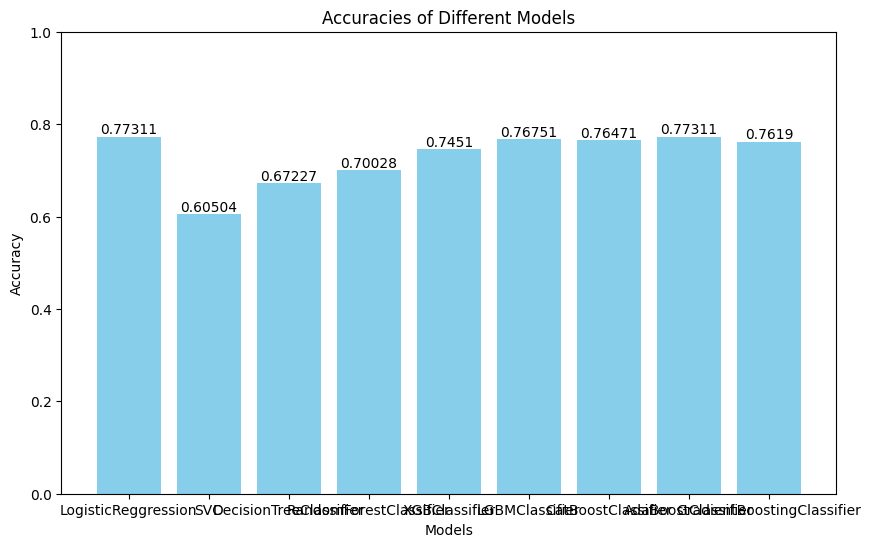

In [365]:
df = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8,accuracy9]
labels = ['LogisticReggression','SVC','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','LGBMClassifier','CatBoostClassifier','AdaBoostClassifier','GradientBoostingClassifier']
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(labels, df, color='skyblue')

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 5), va='bottom', ha='center')

plt.title('Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for better visualization of accuracy values
plt.show()